In [1]:
import Pkg
Pkg.add("Revise")
Pkg.add("IonSim")
Pkg.add("QuantumOptics")
Pkg.add("StochasticDiffEq")
Pkg.add("DSP")
using PyPlot
using Revise
using IonSim
using QuantumOptics: timeevolution, stochastic, Basis

   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`


In [2]:
C = Ca40([("S1/2", -1/2, "g"),("D5/2", -1/2, "e")])
# Create aliases for the qubit states for easier access
#set_sublevel_alias!(C, Dict("g" => ("S1/2", -1/2), "e" => ("D5/2", -1/2)))

# Define the trap configuration. We'll model a single ion in a linear chain
# with a 1 MHz axial motional frequency.
chain = LinearChain(
    ions=[C],
    comfrequencies=(x=3e6, y=3e6, z=1e6),   
    selectedmodes=(;z=[1]) # We only consider the axial mode of motion
)

# Define the laser that will drive the transition
L = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L]
)

polarization!(L, (x̂ - ẑ)/√2)
wavevector!(L, (x̂ + ẑ)/√2);
wavelength_from_transition!(L, C, ("g", "e"), T)
intensity_from_pitime!(L, 4e-6, C, ("g", "e"), T);

ion = ions(T)[1]

ψ0_ion_1 = ion["g"]
ψ0_ion_2 = ion[("S1/2", -1/2)]
ψ0_ion_3 = ionstate(ion, "g")

print(ψ0_ion_1)
mode = modes(T)[1]

ψ0_mode_1 = mode[0]
ψ0_mode_2 = fockstate(mode, 0)
ψ0_mode_3 = groundstate(mode)

print(ψ0_mode_1)
ψ₀ = ion["g"] ⊗ mode[0];

Ket(dim=2)
  basis: ⁴⁰Ca
 1.0 + 0.0im
 0.0 + 0.0imKet(dim=11)
  basis: VibrationalMode(ν=1.0e6, axis=ẑ, N=10)
 1.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im
 0.0 + 0.0im

In [3]:
function pulse(T:: Chamber , tspan, pitime)
    # Define the laser that will drive the transition
    L = T.lasers[1]

    # Combine all components into a single Trap object, which represents the full experiment
    # This is the main object that holds the entire state of our physical system.
    
    pi2_time = pitime*1e6/2

    res_intensity = intensity_from_pitime(L, pitime, T.iontrap.ions[1], ("g", "e"), T)

    function intensity_funtion(t)
    if(t<=pi2_time)
        return res_intensity
    elseif(t>=tspan[end] - pi2_time)
        return res_intensity
    else
        return 0.0
    end

    end
    intensity!(L, intensity_funtion)

    function phase_funtion(t)
        if(t<=pi2_time)
            return 2*pi
        elseif(t>=tspan[end] - pi2_time)
            return pi
        else
            return 0.0
        end
    end

    phase!(L, phase_funtion)
    h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);
    return h
end


function experiment(T::Chamber, wait_time)
    pitime = 4e-6
    tspan = 0: 0.1: wait_time+4

    h = pulse(T, tspan, pitime)
    return h
end

# phase!(L, phase_funtion)
# h = hamiltonian(T, timescale=1e-6, rwa_cutoff=Inf);

experiment (generic function with 1 method)

λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 10000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 20000 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π


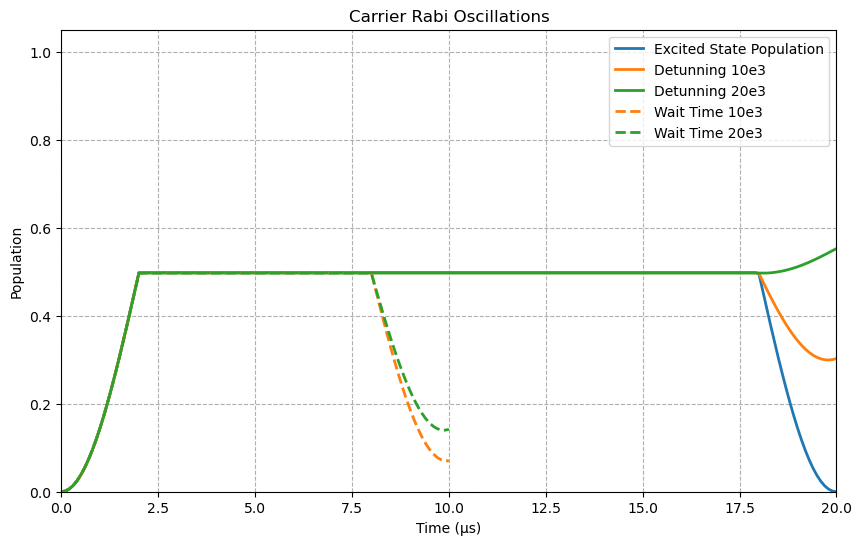

sys:1: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown


In [4]:
tspan = 0:0.1:20
# Solve the time evolution using the Schrödinger equation solver from QuantumOptics.jl
#h = pulse(T, tspan, 4e-6)
h = experiment(T, 16)
tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)


# 5. Analyze and Visualize the Results
# Calculate the population in the excited state |e⟩ over time
excited_pop = expect(ionprojector(T, "e"), sol)
print(L)



L1 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T1 = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    #δB = 0.1,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L1]
)
polarization!(L1, (x̂ - ẑ)/√2)
wavevector!(L1, (x̂ + ẑ)/√2);
wavelength_from_transition!(L1, C, ("g", "e"), T1)
detuning!(L1, 10000)
#h1 = pulse(T1, tspan, 4e-6)
h1 = experiment(T1, 16)
tspan1 = 0:0.1:10
#h1_wait = pulse(T1, tspan1, 4e-6)
h1_wait = experiment(T1, 6)
tout1, sol1 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h1)
excited_pop1 = expect(ionprojector(T1, "e"), sol1)

tout1_wait, sol1_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h1_wait)
excited_pop1_wait = expect(ionprojector(T1, "e"), sol1_wait)
print(L1)


L2 = Laser()

# Combine all components into a single Trap object, which represents the full experiment
# This is the main object that holds the entire state of our physical system.
T2 = Chamber(
    iontrap=chain,
    B=0.37e-3,              # Magnetic field in Tesla
    δB = 1e-6,
    Bhat=ẑ,              # Magnetic field direction
    lasers=[L2]
)
polarization!(L2, (x̂ - ẑ)/√2)
wavevector!(L2, (x̂ + ẑ)/√2);
wavelength_from_transition!(L2, C, ("g", "e"), T2)detuning!(L2, 20000)

#h2 = pulse(T2, tspan, 4e-6)
h2 = experiment(T2, 16)
h2_wait = experiment(T2, 6)
tout2, sol2 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h2)

excited_pop2 = expect(ionprojector(T2, "e"), sol2)

tout2_wait, sol2_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h2_wait)
excited_pop2_wait = expect(ionprojector(T2, "e"), sol2_wait)

print(L2)



# Create the plot using PyPlot
figure(figsize=(10, 6))
plot(tout, real.(excited_pop), label="Excited State Population", color="C0", linewidth=2)
plot(tout1, real.(excited_pop1), label="Detunning 10e3", color="C1", linewidth=2)
plot(tout2, real.(excited_pop2), label="Detunning 20e3", color="C2", linewidth=2)


plot(tout1_wait, real.(excited_pop1_wait), label="Wait Time 10e3", color="C1", linestyle="--", linewidth=2)
plot(tout2_wait, real.(excited_pop2_wait), label="Wait Time 20e3", color="C2", linestyle="--", linewidth=2)


xlim(0, 20)
xlabel("Time (μs)")
ylabel("Population")
title("Carrier Rabi Oscillations")
ylim(0, 1.05)
grid(true, linestyle="--")
legend()
show()
display(gcf())


In [5]:
tspan = 0:0.1:20
function plot_Bfluc(n, deltaB)
    L3 = Laser()

    # Combine all components into a single Trap object, which represents the full experiment
    # This is the main object that holds the entire state of our physical system.
    T3 = Chamber(
        iontrap=chain,
        B=0.37e-3,              # Magnetic field in Tesla
        δB = deltaB,
        Bhat=ẑ,              # Magnetic field direction
        lasers=[L3]
    )
    polarization!(L3, (x̂ - ẑ)/√2)
    wavevector!(L3, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L3, C, ("g", "e"), T3)
    
    h3 = pulse(T3, tspan, 4e-6)

    h3_wait = pulse(T3, tspan1, 4e-6)
    tout3, sol3 = timeevolution.schroedinger_dynamic(tspan, ψ₀, h3)

    excited_pop3 = expect(ionprojector(T3, "e"), sol3)

    tout3_wait, sol3_wait = timeevolution.schroedinger_dynamic(tspan1, ψ₀, h3_wait)
    excited_pop3_wait = expect(ionprojector(T3, "e"), sol3_wait)

    print(L3)
    
    plot(tout3, real.(excited_pop3), label="B_flux $deltaB",  color="C$n", linewidth=2)
    plot(tout3_wait, real.(excited_pop3_wait), color="C$n", linestyle="--", linewidth=2)


end

plot_Bfluc (generic function with 1 method)

λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.291469963176486e-7 m
Δ: 0 Hz
̂ϵ: (x=0.7071067811865475, y=0.0, z=-0.7071067811865475)
k̂: (x=0.7071067811865475, y=0.0, z=0.7071067811865475)
I(t=0): 1.030939867952202e6 W/m²
ϕ(t=0): 1.0 ⋅ 2π
λ: 7.2914699631

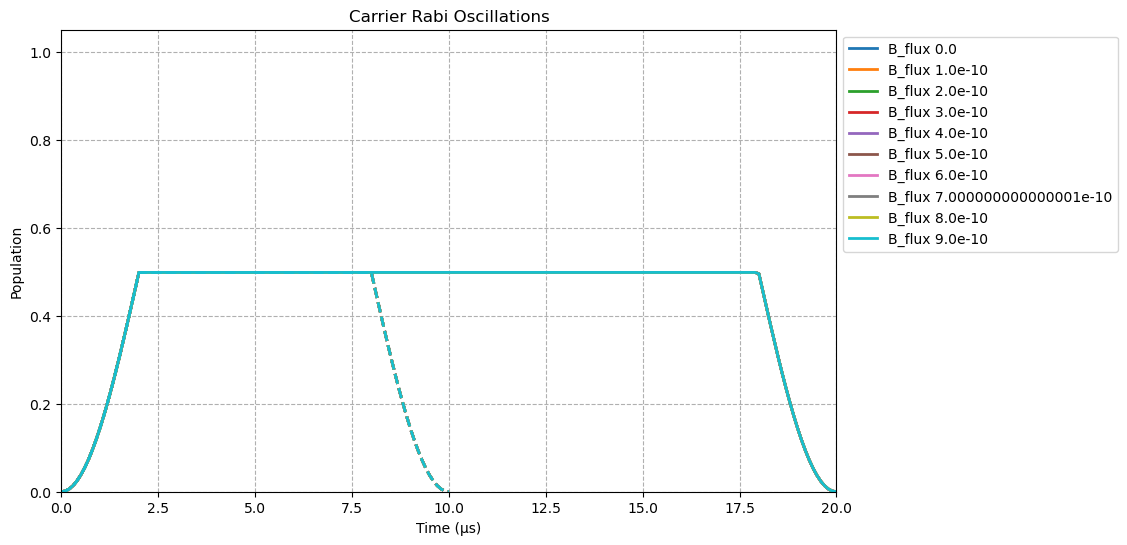

In [6]:
B_span = 0:1e-10:9e-10
figure(figsize=(10, 6))
ct = 0
for w in B_span
    plot_Bfluc(ct, w)
    ct = ct+1
end
xlim(0, 20)
    xlabel("Time (μs)")
    ylabel("Population")
    title("Carrier Rabi Oscillations")
    ylim(0, 1.05)
    grid(true, linestyle="--")
    legend(loc="upper left", bbox_to_anchor=(1, 1))
    show()
    display(gcf())

In [4]:
Pkg.add("ProgressMeter")
using Distributions # You'll need to add this package!
using ProgressMeter # For a nice progress bar

   Resolving package versions...
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Project.toml`
  No Changes to `C:\Users\jewoo\.julia\environments\v1.10\Manifest.toml`


In [ ]:
#  --- 1. System Setup (similar to your code) ---
# C = Ca40()
# chain = LinearChain(
#     ions=[C],
#     com_frequencies=(x=2e6, y=2e6, z=1e6),
#     vibrational_modes=(x=[1], y=[1], z=[1])
# )
# ψ₀ = product_state(C, "g")

# --- 2. Define Noise Parameters from the Paper ---
const N_shots = 200  # Number of experiments to average over. More is better.
const B_rms_shielded = 2.7e-12  # (T) The final shielded noise from the paper
const B_rms_unshielded = 2.7e-11 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution = Normal(0, B_rms_shielded)


# --- 3. Function to run ONE shot of a Ramsey experiment ---
# This function takes a specific, constant δB for a single shot
function run_ramsey_shot(t_wait, δB_shot)
    # The Chamber is now inside the function, as δB changes each time
    L = Laser()
    T = Chamber(
        iontrap=chain,
        B=0.37e-3,
        δB=δB_shot, # Use the random δB for this shot
        Bhat=ẑ,
        lasers=[L]
    )
    polarization!(L, (x̂ - ẑ)/√2)
    wavevector!(L, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L, C, ("g", "e"), T)

    # Ramsey sequence: π/2 pulse, wait, π/2 pulse
    tspan = 0:0.1:t_wait*1e6
    h = pulse(T, tspan, 4e-6)
    tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)
    # Note: Rabi frequency and pulse times are illustrative
    # Ω = 2π * 50e3
    # τ_π_half = π / (2Ω)

    # # First π/2 pulse
    # _, sol_1 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ₀, h)
    # ψ_after_pulse1 = last(sol_1)

    # # Wait time (free evolution)
    # # During the wait, only the base Hamiltonian h affects the ion
    # _, sol_wait = timeevolution.schroedinger_dynamic(0:0.01e-6:t_wait, ψ_after_pulse1, h)
    # ψ_after_wait = last(sol_wait)

    # # Second π/2 pulse
    # _, sol_2 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ_after_wait, h)
    # ψ_final = last(sol_2)

    # Return the final probability of being in the 'g' state
    return expect(ionprojector(T, "g"), sol[end])
end


# --- 4. Main Simulation Loop (Ensemble Average) ---
function simulate_decoherence()
    wait_times = 5e-3:5e-3:300e-3 # Simulate for 300 ms, as in the paper's Ramsey fig
    avg_g_population = []

    @showprogress "Simulating Ramsey Fringes..." for t in wait_times
        final_pops_for_t = zeros(N_shots)
        for i in 1:N_shots
            # For each shot, draw a NEW random magnetic field offset
            δB_shot = rand(noise_distribution)
            final_pops_for_t[i] = run_ramsey_shot(t, δB_shot)
        end
        # Average the results from all shots for this wait time
        push!(avg_g_population, real(sum(final_pops_for_t) / N_shots))
        # println("Wait time $(t*1e3) ms: Avg. g-pop = $(avg_g_population)")
    end
    return wait_times, avg_g_population
end

# --- 5. Run and Plot ---
println("Running simulation with SHIELDED noise (B_rms = $B_rms_shielded T)")
times, pops = simulate_decoherence()
println(times)
println(pops)

# You can re-run with the unshielded value to compare!
# noise_distribution = Normal(0, B_rms_unshielded)
# println("Running simulation with UNSHIELDED noise (B_rms = $B_rms_unshielded T)")
# times_unshielded, pops_unshielded = simulate_decoherence()

figure(figsize=(10, 6))
plot(times * 1e3, pops, label="Shielded Simulation (σ_B = 2.7 pT)", linewidth=2)
# plot(times_unshielded * 1e3, pops_unshielded, label="Unshielded Simulation (σ_B = 27 pT)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

Running simulation with SHIELDED noise (B_rms = 2.7e-12 T)


Simulating Ramsey Fringes...  35%|█████████              |  ETA: 5:03:56

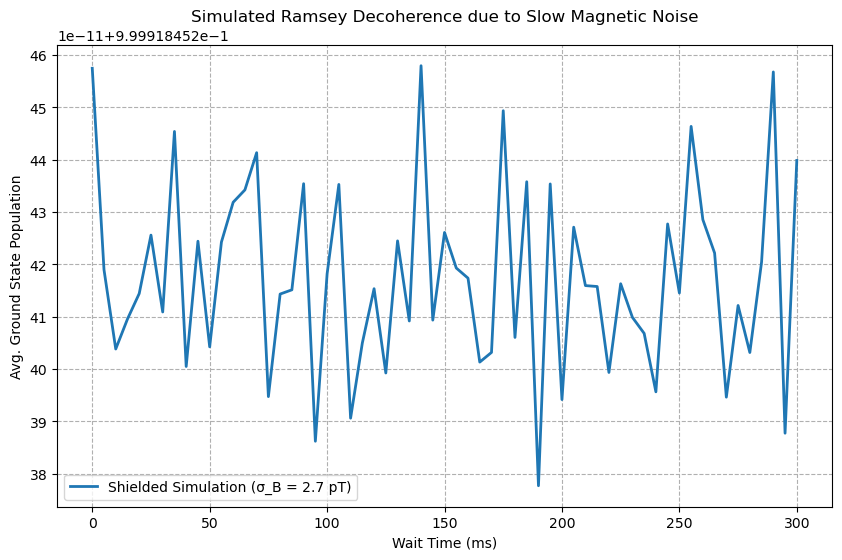

In [9]:
figure(figsize=(10, 6))
plot(times * 1e3, pops, label="Shielded Simulation (σ_B = 2.7 pT)", linewidth=2)
# plot(times_unshielded * 1e3, pops_unshielded, label="Unshielded Simulation (σ_B = 27 pT)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

Running simulation with SHIELDED noise (B_rms = 2.7e-11 T)


Simulating Ramsey Fringes... 100%|███████████████████████| Time: 0:01:38


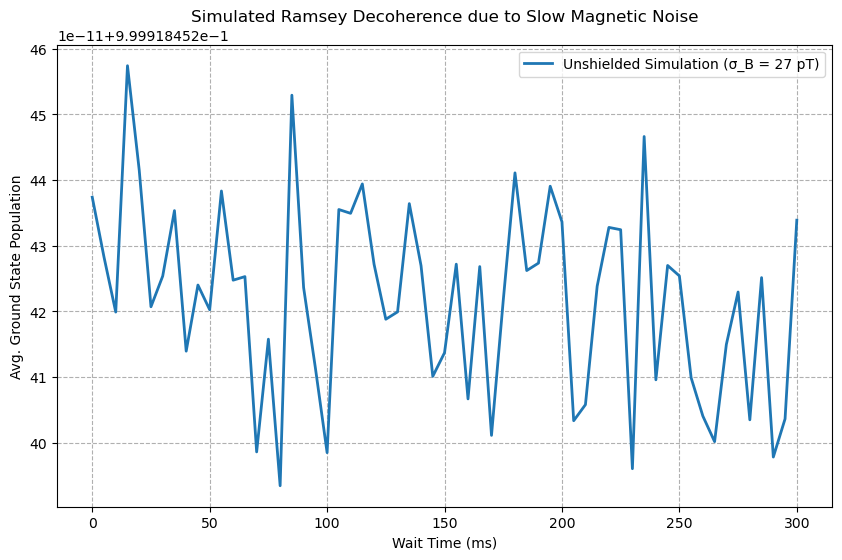

In [10]:
#  --- 1. System Setup (similar to your code) ---
# C = Ca40()
# chain = LinearChain(
#     ions=[C],
#     com_frequencies=(x=2e6, y=2e6, z=1e6),
#     vibrational_modes=(x=[1], y=[1], z=[1])
# )
# ψ₀ = product_state(C, "g")

# --- 2. Define Noise Parameters from the Paper ---
const N_shots = 200  # Number of experiments to average over. More is better.
const B_rms_shielded = 2.7e-12  # (T) The final shielded noise from the paper
const B_rms_unshielded = 2.7e-11 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution = Normal(0, B_rms_shielded)


# --- 3. Function to run ONE shot of a Ramsey experiment ---
# This function takes a specific, constant δB for a single shot
function run_ramsey_shot(t_wait, δB_shot)
    # The Chamber is now inside the function, as δB changes each time
    L = Laser()
    T = Chamber(
        iontrap=chain,
        B=0.37e-3,
        δB=δB_shot, # Use the random δB for this shot
        Bhat=ẑ,
        lasers=[L]
    )
    polarization!(L, (x̂ - ẑ)/√2)
    wavevector!(L, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L, C, ("g", "e"), T)

    # Ramsey sequence: π/2 pulse, wait, π/2 pulse
    h = pulse(T, tspan, 4e-6)
    tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)
    # Note: Rabi frequency and pulse times are illustrative
    # Ω = 2π * 50e3
    # τ_π_half = π / (2Ω)

    # # First π/2 pulse
    # _, sol_1 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ₀, h)
    # ψ_after_pulse1 = last(sol_1)

    # # Wait time (free evolution)
    # # During the wait, only the base Hamiltonian h affects the ion
    # _, sol_wait = timeevolution.schroedinger_dynamic(0:0.01e-6:t_wait, ψ_after_pulse1, h)
    # ψ_after_wait = last(sol_wait)

    # # Second π/2 pulse
    # _, sol_2 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ_after_wait, h)
    # ψ_final = last(sol_2)

    # Return the final probability of being in the 'g' state
    return expect(ionprojector(T, "g"), sol[end])
end


# --- 4. Main Simulation Loop (Ensemble Average) ---
function simulate_decoherence()
    wait_times = 0:5e-3:300e-3 # Simulate for 300 ms, as in the paper's Ramsey fig
    avg_g_population = []

    @showprogress "Simulating Ramsey Fringes..." for t in wait_times
        final_pops_for_t = zeros(N_shots)
        for i in 1:N_shots
            # For each shot, draw a NEW random magnetic field offset
            δB_shot = rand(noise_distribution)
            final_pops_for_t[i] = run_ramsey_shot(t, δB_shot)
        end
        # Average the results from all shots for this wait time
        push!(avg_g_population, real(sum(final_pops_for_t) / N_shots))
        # println("Wait time $(t*1e3) ms: Avg. g-pop = $(avg_g_population)")
    end
    return wait_times, avg_g_population
end

# --- 5. Run and Plot ---
println("Running simulation with SHIELDED noise (B_rms = $B_rms_unshielded T)")
#times, pops = simulate_decoherence()
# println(times)
# println(pops)

# You can re-run with the unshielded value to compare!
# noise_distribution = Normal(0, B_rms_unshielded)
# println("Running simulation with UNSHIELDED noise (B_rms = $B_rms_unshielded T)")
 times_unshielded, pops_unshielded = simulate_decoherence()

figure(figsize=(10, 6))
# plot(times * 1e3, pops, label="Shielded Simulation (σ_B = 2.7 pT)", linewidth=2)
plot(times_unshielded * 1e3, pops_unshielded, label="Unshielded Simulation (σ_B = 27 pT)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

Running simulation with no noise (B_rms = 0T)
Wait time 0.0 ms: Avg. g-pop = Any[0.9999184524058556]
Wait time 5.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641]


Simulating Ramsey Fringes...   3%|█                      |  ETA: 0:01:44

Wait time 10.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854]


Simulating Ramsey Fringes...   5%|██                     |  ETA: 0:01:40

Wait time 15.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377]


Simulating Ramsey Fringes...   7%|██                     |  ETA: 0:01:36

Wait time 20.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205]


Simulating Ramsey Fringes...   8%|██                     |  ETA: 0:01:33

Wait time 25.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998]


Simulating Ramsey Fringes...  10%|███                    |  ETA: 0:01:33

Wait time 30.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185]


Simulating Ramsey Fringes...  11%|███                    |  ETA: 0:01:31

Wait time 35.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161]


Simulating Ramsey Fringes...  13%|████                   |  ETA: 0:01:29

Wait time 40.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083]


Simulating Ramsey Fringes...  15%|████                   |  ETA: 0:01:27

Wait time 45.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821]


Simulating Ramsey Fringes...  16%|████                   |  ETA: 0:01:26

Wait time 50.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862]


Simulating Ramsey Fringes...  20%|█████                  |  ETA: 0:01:22

Wait time 55.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218]
Wait time 60.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183]


Simulating Ramsey Fringes...  21%|█████                  |  ETA: 0:01:21

Wait time 65.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188]


Simulating Ramsey Fringes...  23%|██████                 |  ETA: 0:01:20

Wait time 70.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493]


Simulating Ramsey Fringes...  25%|██████                 |  ETA: 0:01:18

Wait time 75.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496]


Simulating Ramsey Fringes...  26%|███████                |  ETA: 0:01:16

Wait time 80.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168]


Simulating Ramsey Fringes...  28%|███████                |  ETA: 0:01:15

Wait time 85.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125]


Simulating Ramsey Fringes...  30%|███████                |  ETA: 0:01:13

Wait time 90.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475]


Simulating Ramsey Fringes...  31%|████████               |  ETA: 0:01:11

Wait time 95.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351]


Simulating Ramsey Fringes...  34%|████████               |  ETA: 0:01:08

Wait time 100.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862]
Wait time 105.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092]


Simulating Ramsey Fringes...  36%|█████████              |  ETA: 0:01:06

Wait time 110.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097]


Simulating Ramsey Fringes...  38%|█████████              |  ETA: 0:01:04

Wait time 115.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638]


Simulating Ramsey Fringes...  39%|██████████             |  ETA: 0:01:03

Wait time 120.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006]


Simulating Ramsey Fringes...  41%|██████████             |  ETA: 0:01:01

Wait time 125.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003]


Simulating Ramsey Fringes...  44%|███████████            |  ETA: 0:00:57

Wait time 130.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662]
Wait time 135.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184

Simulating Ramsey Fringes...  46%|███████████            |  ETA: 0:00:55

Wait time 140.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236]


Simulating Ramsey Fringes...  48%|███████████            |  ETA: 0:00:54

Wait time 145.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238]


Simulating Ramsey Fringes...  49%|████████████           |  ETA: 0:00:52

Wait time 150.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477]


Simulating Ramsey Fringes...  51%|████████████           |  ETA: 0:00:50

Wait time 155.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343]


Simulating Ramsey Fringes...  52%|█████████████          |  ETA: 0:00:48

Wait time 160.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068]


Simulating Ramsey Fringes...  54%|█████████████          |  ETA: 0:00:47

Wait time 165.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697]


Simulating Ramsey Fringes...  56%|█████████████          |  ETA: 0:00:45

Wait time 170.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246]


Simulating Ramsey Fringes...  57%|██████████████         |  ETA: 0:00:43

Wait time 175.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272]


Simulating Ramsey Fringes...  59%|██████████████         |  ETA: 0:00:42

Wait time 180.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783]


Simulating Ramsey Fringes...  61%|██████████████         |  ETA: 0:00:40

Wait time 185.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002]


Simulating Ramsey Fringes...  62%|███████████████        |  ETA: 0:00:38

Wait time 190.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646]


Simulating Ramsey Fringes...  64%|███████████████        |  ETA: 0:00:37

Wait time 195.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953]


Simulating Ramsey Fringes...  66%|████████████████       |  ETA: 0:00:35

Wait time 200.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578]


Simulating Ramsey Fringes...  67%|████████████████       |  ETA: 0:00:33

Wait time 205.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104]


Simulating Ramsey Fringes...  69%|████████████████       |  ETA: 0:00:31

Wait time 210.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377]


Simulating Ramsey Fringes...  70%|█████████████████      |  ETA: 0:00:30

Wait time 215.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472]


Simulating Ramsey Fringes...  72%|█████████████████      |  ETA: 0:00:28

Wait time 220.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173]


Simulating Ramsey Fringes...  74%|█████████████████      |  ETA: 0:00:26

Wait time 225.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364]


Simulating Ramsey Fringes...  75%|██████████████████     |  ETA: 0:00:25

Wait time 230.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586]


Simulating Ramsey Fringes...  77%|██████████████████     |  ETA: 0:00:23

Wait time 235.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339]


Simulating Ramsey Fringes...  79%|███████████████████    |  ETA: 0:00:21

Wait time 240.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  80%|███████████████████    |  ETA: 0:00:20

Wait time 245.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  82%|███████████████████    |  ETA: 0:00:18

Wait time 250.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  84%|████████████████████   |  ETA: 0:00:17

Wait time 255.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  85%|████████████████████   |  ETA: 0:00:15

Wait time 260.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  87%|████████████████████   |  ETA: 0:00:13

Wait time 265.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  89%|█████████████████████  |  ETA: 0:00:12

Wait time 270.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  90%|█████████████████████  |  ETA: 0:00:10

Wait time 275.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  92%|██████████████████████ |  ETA: 0:00:08

Wait time 280.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  93%|██████████████████████ |  ETA: 0:00:07

Wait time 285.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  95%|██████████████████████ |  ETA: 0:00:05

Wait time 290.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  97%|███████████████████████|  ETA: 0:00:03

Wait time 295.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes...  98%|███████████████████████|  ETA: 0:00:02

Wait time 300.0 ms: Avg. g-pop = Any[0.9999184524058556, 0.9999184524416641, 0.9999184523991854, 0.9999184524200377, 0.999918452436205, 0.9999184524215998, 0.9999184523979185, 0.9999184524311161, 0.9999184524005083, 0.9999184524131821, 0.9999184524027862, 0.9999184524228218, 0.9999184524138183, 0.9999184524145188, 0.9999184524135493, 0.9999184524099496, 0.9999184524259168, 0.9999184524181125, 0.9999184524426475, 0.9999184523870351, 0.9999184524120862, 0.9999184524513092, 0.999918452459097, 0.9999184524120638, 0.9999184523855006, 0.9999184524162003, 0.9999184523908662, 0.9999184524305393, 0.9999184524169236, 0.9999184524049238, 0.9999184524104477, 0.9999184524463343, 0.9999184524347068, 0.9999184524434697, 0.9999184524228246, 0.9999184524413272, 0.9999184524269783, 0.9999184524314002, 0.9999184524312646, 0.9999184524398953, 0.9999184524301578, 0.9999184524395104, 0.9999184524238377, 0.9999184524335472, 0.9999184524321173, 0.9999184524219364, 0.9999184523968586, 0.999918452389339, 0.9999

Simulating Ramsey Fringes... 100%|███████████████████████| Time: 0:01:40


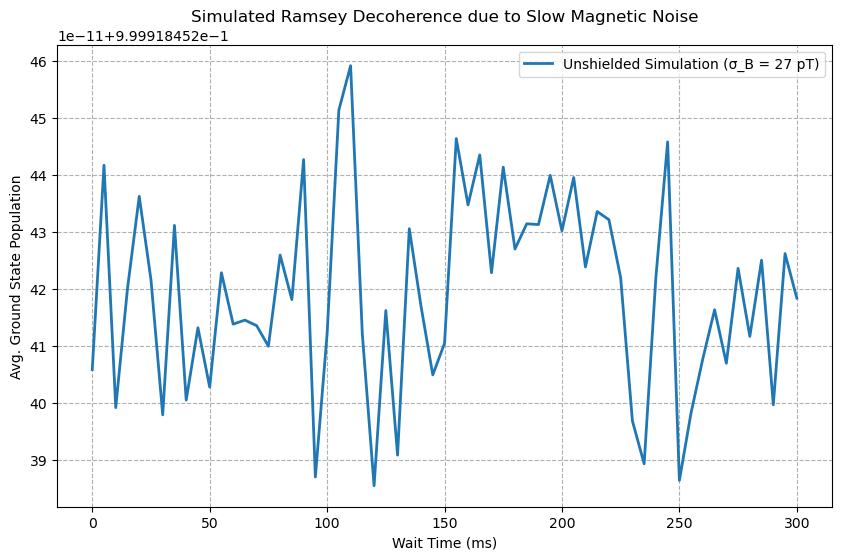

In [11]:
#  --- 1. System Setup (similar to your code) ---
# C = Ca40()
# chain = LinearChain(
#     ions=[C],
#     com_frequencies=(x=2e6, y=2e6, z=1e6),
#     vibrational_modes=(x=[1], y=[1], z=[1])
# )
# ψ₀ = product_state(C, "g")

# --- 2. Define Noise Parameters from the Paper ---
const N_shots = 200  # Number of experiments to average over. More is better.
const B_rms_shielded = 2.7e-12  # (T) The final shielded noise from the paper
const B_rms_unshielded = 2.7e-11 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution = Normal(0, B_rms_shielded)


# --- 3. Function to run ONE shot of a Ramsey experiment ---
# This function takes a specific, constant δB for a single shot
function run_ramsey_shot(t_wait, δB_shot)
    # The Chamber is now inside the function, as δB changes each time
    L = Laser()
    T = Chamber(
        iontrap=chain,
        B=0.37e-3,
        δB=δB_shot, # Use the random δB for this shot
        Bhat=ẑ,
        lasers=[L]
    )
    polarization!(L, (x̂ - ẑ)/√2)
    wavevector!(L, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L, C, ("g", "e"), T)

    # Ramsey sequence: π/2 pulse, wait, π/2 pulse
    h = pulse(T, tspan, 4e-6)
    tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)
    # Note: Rabi frequency and pulse times are illustrative
    # Ω = 2π * 50e3
    # τ_π_half = π / (2Ω)

    # # First π/2 pulse
    # _, sol_1 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ₀, h)
    # ψ_after_pulse1 = last(sol_1)

    # # Wait time (free evolution)
    # # During the wait, only the base Hamiltonian h affects the ion
    # _, sol_wait = timeevolution.schroedinger_dynamic(0:0.01e-6:t_wait, ψ_after_pulse1, h)
    # ψ_after_wait = last(sol_wait)

    # # Second π/2 pulse
    # _, sol_2 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ_after_wait, h)
    # ψ_final = last(sol_2)

    # Return the final probability of being in the 'g' state
    return expect(ionprojector(T, "g"), sol[end])
end


# --- 4. Main Simulation Loop (Ensemble Average) ---
function simulate_decoherence()
    wait_times = 0:5e-3:300e-3 # Simulate for 300 ms, as in the paper's Ramsey fig
    avg_g_population = []

    @showprogress "Simulating Ramsey Fringes..." for t in wait_times
        final_pops_for_t = zeros(N_shots)
        for i in 1:N_shots
            # For each shot, draw a NEW random magnetic field offset
            δB_shot = rand(noise_distribution)
            final_pops_for_t[i] = run_ramsey_shot(t, δB_shot)
            # if (i>1 && final_pops_for_t[i] != 200)
            #     # If the population decreases, we can stop early
            #     println("finalpop i $(final_pops_for_t[i]) , $(final_pops_for_t[i-1]), $(δB_shot) ")
            # end
        end
        # Average the results from all shots for this wait time
        push!(avg_g_population, real(sum(final_pops_for_t) / N_shots))
        println("Wait time $(t*1e3) ms: Avg. g-pop = $(avg_g_population)")
        flush(stdout)
    end
    return wait_times, avg_g_population
end

# --- 5. Run and Plot ---
println("Running simulation with no noise (B_rms = 0T)")
#times, pops = simulate_decoherence()
# println(times)
# println(pops)

# You can re-run with the unshielded value to compare!
# noise_distribution = Normal(0, B_rms_unshielded)
# println("Running simulation with UNSHIELDED noise (B_rms = $B_rms_unshielded T)")
 times_unshielded, pops_unshielded = simulate_decoherence()

figure(figsize=(10, 6))
# plot(times * 1e3, pops, label="Shielded Simulation (σ_B = 2.7 pT)", linewidth=2)
plot(times_unshielded * 1e3, pops_unshielded, label="Unshielded Simulation (σ_B = 27 pT)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

Running simulation with SHIELDED noise (B_rms = 2.7e-12 T)
Wait time 0.0 ms: Avg. g-pop = Any[0.9999184524387502]


Simulating Ramsey Fringes...   3%|█                      |  ETA: 0:01:31

Wait time 5.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507]


Simulating Ramsey Fringes...   5%|██                     |  ETA: 0:01:30

Wait time 10.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372]


Simulating Ramsey Fringes...   7%|██                     |  ETA: 0:01:31

Wait time 15.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929]


Simulating Ramsey Fringes...   8%|██                     |  ETA: 0:01:30

Wait time 20.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208]


Simulating Ramsey Fringes...  10%|███                    |  ETA: 0:01:30

Wait time 25.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809]


Simulating Ramsey Fringes...  11%|███                    |  ETA: 0:01:29

Wait time 30.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366]


Simulating Ramsey Fringes...  13%|████                   |  ETA: 0:01:28

Wait time 35.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067]


Simulating Ramsey Fringes...  15%|████                   |  ETA: 0:01:26

Wait time 40.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692]
Wait time 45.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838]

Simulating Ramsey Fringes...  16%|████                   |  ETA: 0:01:25

Simulating Ramsey Fringes...  18%|█████                  |  ETA: 0:01:23

Wait time 50.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908]


Simulating Ramsey Fringes...  20%|█████                  |  ETA: 0:01:22

Wait time 55.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184]


Simulating Ramsey Fringes...  21%|█████                  |  ETA: 0:01:21

Wait time 60.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577]


Simulating Ramsey Fringes...  23%|██████                 |  ETA: 0:01:20

Wait time 65.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508]


Simulating Ramsey Fringes...  25%|██████                 |  ETA: 0:01:18

Wait time 70.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379]


Simulating Ramsey Fringes...  26%|███████                |  ETA: 0:01:16

Wait time 75.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712]


Simulating Ramsey Fringes...  28%|███████                |  ETA: 0:01:14

Wait time 80.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243]


Simulating Ramsey Fringes...  30%|███████                |  ETA: 0:01:12

Wait time 85.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232]


Simulating Ramsey Fringes...  31%|████████               |  ETA: 0:01:10

Wait time 90.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288]


Simulating Ramsey Fringes...  33%|████████               |  ETA: 0:01:08

Wait time 95.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065]


Simulating Ramsey Fringes...  34%|████████               |  ETA: 0:01:06

Wait time 100.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446]


Simulating Ramsey Fringes...  36%|█████████              |  ETA: 0:01:05

Wait time 105.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046]


Simulating Ramsey Fringes...  38%|█████████              |  ETA: 0:01:03

Wait time 110.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636]


Simulating Ramsey Fringes...  39%|██████████             |  ETA: 0:01:01

Wait time 115.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342]


Simulating Ramsey Fringes...  41%|██████████             |  ETA: 0:01:00

Wait time 120.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086]


Simulating Ramsey Fringes...  43%|██████████             |  ETA: 0:00:58

Wait time 125.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052]


Simulating Ramsey Fringes...  44%|███████████            |  ETA: 0:00:57

Wait time 130.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732]


Simulating Ramsey Fringes...  46%|███████████            |  ETA: 0:00:55

Wait time 135.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797]


Simulating Ramsey Fringes...  48%|███████████            |  ETA: 0:00:54

Wait time 140.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839]


Simulating Ramsey Fringes...  49%|████████████           |  ETA: 0:00:52

Wait time 145.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794]


Simulating Ramsey Fringes...  51%|████████████           |  ETA: 0:00:50

Wait time 150.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653]


Simulating Ramsey Fringes...  52%|█████████████          |  ETA: 0:00:48

Wait time 155.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525]


Simulating Ramsey Fringes...  54%|█████████████          |  ETA: 0:00:47

Wait time 160.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554]


Simulating Ramsey Fringes...  56%|█████████████          |  ETA: 0:00:45

Wait time 165.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663]


Simulating Ramsey Fringes...  57%|██████████████         |  ETA: 0:00:43

Wait time 170.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329]


Simulating Ramsey Fringes...  59%|██████████████         |  ETA: 0:00:42

Wait time 175.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037]


Simulating Ramsey Fringes...  61%|██████████████         |  ETA: 0:00:40

Wait time 180.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205]


Simulating Ramsey Fringes...  62%|███████████████        |  ETA: 0:00:38

Wait time 185.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002]


Simulating Ramsey Fringes...  64%|███████████████        |  ETA: 0:00:37

Wait time 190.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908]


Simulating Ramsey Fringes...  66%|████████████████       |  ETA: 0:00:35

Wait time 195.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131]


Simulating Ramsey Fringes...  67%|████████████████       |  ETA: 0:00:34

Wait time 200.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299]


Simulating Ramsey Fringes...  69%|████████████████       |  ETA: 0:00:32

Wait time 205.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977]


Simulating Ramsey Fringes...  70%|█████████████████      |  ETA: 0:00:30

Wait time 210.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432]


Simulating Ramsey Fringes...  72%|█████████████████      |  ETA: 0:00:28

Wait time 215.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557]


Simulating Ramsey Fringes...  74%|█████████████████      |  ETA: 0:00:27

Wait time 220.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291]


Simulating Ramsey Fringes...  75%|██████████████████     |  ETA: 0:00:25

Wait time 225.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663]


Simulating Ramsey Fringes...  77%|██████████████████     |  ETA: 0:00:23

Wait time 230.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831]


Simulating Ramsey Fringes...  79%|███████████████████    |  ETA: 0:00:21

Wait time 235.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866]


Simulating Ramsey Fringes...  80%|███████████████████    |  ETA: 0:00:20

Wait time 240.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  82%|███████████████████    |  ETA: 0:00:18

Wait time 245.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  84%|████████████████████   |  ETA: 0:00:17

Wait time 250.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  85%|████████████████████   |  ETA: 0:00:15

Wait time 255.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  87%|████████████████████   |  ETA: 0:00:13

Wait time 260.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  89%|█████████████████████  |  ETA: 0:00:12

Wait time 265.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  90%|█████████████████████  |  ETA: 0:00:10

Wait time 270.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  92%|██████████████████████ |  ETA: 0:00:08

Wait time 275.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  93%|██████████████████████ |  ETA: 0:00:07

Wait time 280.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  95%|██████████████████████ |  ETA: 0:00:05

Wait time 285.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  97%|███████████████████████|  ETA: 0:00:03

Wait time 290.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes...  98%|███████████████████████|  ETA: 0:00:02

Wait time 295.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

Simulating Ramsey Fringes... 100%|███████████████████████| Time: 0:01:40


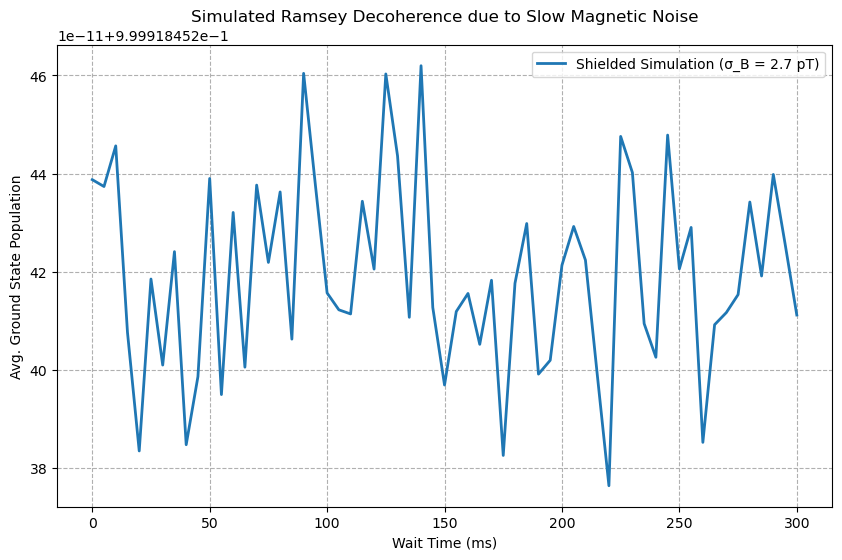

Wait time 300.0 ms: Avg. g-pop = Any[0.9999184524387502, 0.9999184524373507, 0.9999184524456372, 0.9999184524075929, 0.9999184523834208, 0.9999184524184809, 0.9999184524009366, 0.999918452424067, 0.999918452384692, 0.9999184523985838, 0.9999184524389908, 0.9999184523949184, 0.9999184524320577, 0.999918452400508, 0.9999184524376379, 0.9999184524218712, 0.999918452436243, 0.9999184524062232, 0.9999184524604288, 0.9999184524377065, 0.9999184524156446, 0.9999184524122046, 0.9999184524113636, 0.999918452434342, 0.9999184524205086, 0.9999184524603052, 0.9999184524435732, 0.9999184524106797, 0.9999184524619839, 0.9999184524126794, 0.9999184523968653, 0.9999184524118525, 0.99991845241554, 0.9999184524051663, 0.9999184524182329, 0.9999184523825037, 0.9999184524176205, 0.9999184524298002, 0.9999184523990908, 0.9999184524019131, 0.999918452421299, 0.9999184524291977, 0.9999184524223432, 0.9999184523991557, 0.9999184523763291, 0.9999184524475663, 0.9999184524401831, 0.9999184524093866, 0.999918452

In [12]:
#  --- 1. System Setup (similar to your code) ---
# C = Ca40()
# chain = LinearChain(
#     ions=[C],
#     com_frequencies=(x=2e6, y=2e6, z=1e6),
#     vibrational_modes=(x=[1], y=[1], z=[1])
# )
# ψ₀ = product_state(C, "g")

# --- 2. Define Noise Parameters from the Paper ---
const N_shots = 200  # Number of experiments to average over. More is better.
const B_rms_shielded = 2.7e-12  # (T) The final shielded noise from the paper
const B_rms_unshielded = 2.7e-11 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution = Normal(0, B_rms_shielded)


# --- 3. Function to run ONE shot of a Ramsey experiment ---
# This function takes a specific, constant δB for a single shot
function run_ramsey_shot(t_wait, δB_shot)
    # The Chamber is now inside the function, as δB changes each time
    L = Laser()
    T = Chamber(
        iontrap=chain,
        B=0.37e-3,
        δB=δB_shot, # Use the random δB for this shot
        Bhat=ẑ,
        lasers=[L]
    )
    polarization!(L, (x̂ - ẑ)/√2)
    wavevector!(L, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L, C, ("g", "e"), T)

    # Ramsey sequence: π/2 pulse, wait, π/2 pulse
    h = pulse(T, tspan, 4e-6)
    tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)
    # Note: Rabi frequency and pulse times are illustrative
    # Ω = 2π * 50e3
    # τ_π_half = π / (2Ω)

    # # First π/2 pulse
    # _, sol_1 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ₀, h)
    # ψ_after_pulse1 = last(sol_1)

    # # Wait time (free evolution)
    # # During the wait, only the base Hamiltonian h affects the ion
    # _, sol_wait = timeevolution.schroedinger_dynamic(0:0.01e-6:t_wait, ψ_after_pulse1, h)
    # ψ_after_wait = last(sol_wait)

    # # Second π/2 pulse
    # _, sol_2 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ_after_wait, h)
    # ψ_final = last(sol_2)

    # Return the final probability of being in the 'g' state
    return expect(ionprojector(T, "g"), sol[end])
end


# --- 4. Main Simulation Loop (Ensemble Average) ---
function simulate_decoherence()
    wait_times = 0:5e-3:300e-3 # Simulate for 300 ms, as in the paper's Ramsey fig
    avg_g_population = []

    @showprogress "Simulating Ramsey Fringes..." for t in wait_times
        final_pops_for_t = zeros(N_shots)
        for i in 1:N_shots
            # For each shot, draw a NEW random magnetic field offset
            δB_shot = rand(noise_distribution)
            final_pops_for_t[i] = run_ramsey_shot(t, δB_shot)
        end
        # Average the results from all shots for this wait time
        push!(avg_g_population, real(sum(final_pops_for_t) / N_shots))
        println("Wait time $(t*1e3) ms: Avg. g-pop = $(avg_g_population)")
    end
    return wait_times, avg_g_population
end

# --- 5. Run and Plot ---
println("Running simulation with SHIELDED noise (B_rms = $B_rms_shielded T)")
times, pops = simulate_decoherence()
println(times)
println(pops)

# You can re-run with the unshielded value to compare!
# noise_distribution = Normal(0, B_rms_unshielded)
# println("Running simulation with UNSHIELDED noise (B_rms = $B_rms_unshielded T)")
# times_unshielded, pops_unshielded = simulate_decoherence()

figure(figsize=(10, 6))
plot(times * 1e3, pops, label="Shielded Simulation (σ_B = 2.7 pT)", linewidth=2)
# plot(times_unshielded * 1e3, pops_unshielded, label="Unshielded Simulation (σ_B = 27 pT)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

In [13]:
println("Done")
"Done"

Done


"Done"

Running simulation with SHIELDED noise (B_rms = 2.0e-6 T)


Simulating Ramsey Fringes... 100%|███████████████████████| Time: 0:24:19


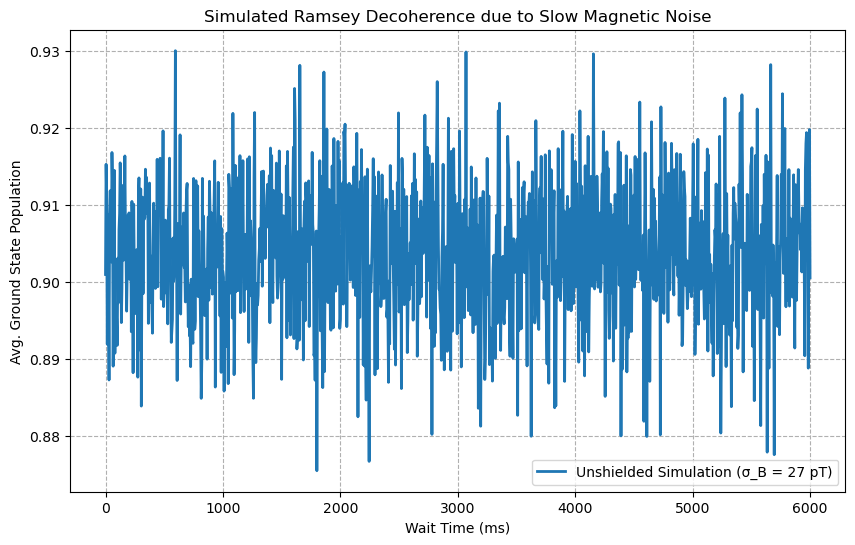

In [15]:
#  --- 1. System Setup (similar to your code) ---
# C = Ca40()
# chain = LinearChain(
#     ions=[C],
#     com_frequencies=(x=2e6, y=2e6, z=1e6),
#     vibrational_modes=(x=[1], y=[1], z=[1])
# )
# ψ₀ = product_state(C, "g")

# --- 2. Define Noise Parameters from the Paper ---
const N_shots = 200  # Number of experiments to average over. More is better.
const B_rms_shielded = 1e-6  # (T) The final shielded noise from the paper
const B_rms_unshielded = 2e-6 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution = Normal(0, B_rms_shielded)


# --- 3. Function to run ONE shot of a Ramsey experiment ---
# This function takes a specific, constant δB for a single shot
function run_ramsey_shot(t_wait, δB_shot)
    # The Chamber is now inside the function, as δB changes each time
    L = Laser()
    T = Chamber(
        iontrap=chain,
        B=0.37e-3,
        δB=δB_shot, # Use the random δB for this shot
        Bhat=ẑ,
        lasers=[L]
    )
    polarization!(L, (x̂ - ẑ)/√2)
    wavevector!(L, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L, C, ("g", "e"), T)

    # Ramsey sequence: π/2 pulse, wait, π/2 pulse
    h = pulse(T, tspan, 4e-6)
    tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)
    # Note: Rabi frequency and pulse times are illustrative
    # Ω = 2π * 50e3
    # τ_π_half = π / (2Ω)

    # # First π/2 pulse
    # _, sol_1 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ₀, h)
    # ψ_after_pulse1 = last(sol_1)

    # # Wait time (free evolution)
    # # During the wait, only the base Hamiltonian h affects the ion
    # _, sol_wait = timeevolution.schroedinger_dynamic(0:0.01e-6:t_wait, ψ_after_pulse1, h)
    # ψ_after_wait = last(sol_wait)

    # # Second π/2 pulse
    # _, sol_2 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ_after_wait, h)
    # ψ_final = last(sol_2)

    # Return the final probability of being in the 'g' state
    return expect(ionprojector(T, "g"), sol[end])
end


# --- 4. Main Simulation Loop (Ensemble Average) ---
function simulate_decoherence()
    wait_times = 0:5e-3:6 # Simulate for 300 ms, as in the paper's Ramsey fig
    avg_g_population = []

    @showprogress "Simulating Ramsey Fringes..." for t in wait_times
        final_pops_for_t = zeros(N_shots)
        for i in 1:N_shots
            # For each shot, draw a NEW random magnetic field offset
            δB_shot = rand(noise_distribution)
            final_pops_for_t[i] = run_ramsey_shot(t, δB_shot)
        end
        # Average the results from all shots for this wait time
        push!(avg_g_population, real(sum(final_pops_for_t) / N_shots))
        # println("Wait time $(t*1e3) ms: Avg. g-pop = $(avg_g_population)")
    end
    return wait_times, avg_g_population
end

# --- 5. Run and Plot ---
println("Running simulation with SHIELDED noise (B_rms = $B_rms_unshielded T)")
#times, pops = simulate_decoherence()
# println(times)
# println(pops)

# You can re-run with the unshielded value to compare!
# noise_distribution = Normal(0, B_rms_unshielded)
# println("Running simulation with UNSHIELDED noise (B_rms = $B_rms_unshielded T)")
 times_unshielded, pops_unshielded = simulate_decoherence()

figure(figsize=(10, 6))
# plot(times * 1e3, pops, label="Shielded Simulation (σ_B = 2.7 pT)", linewidth=2)
plot(times_unshielded * 1e3, pops_unshielded, label="Unshielded Simulation (σ_B = 27 pT)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

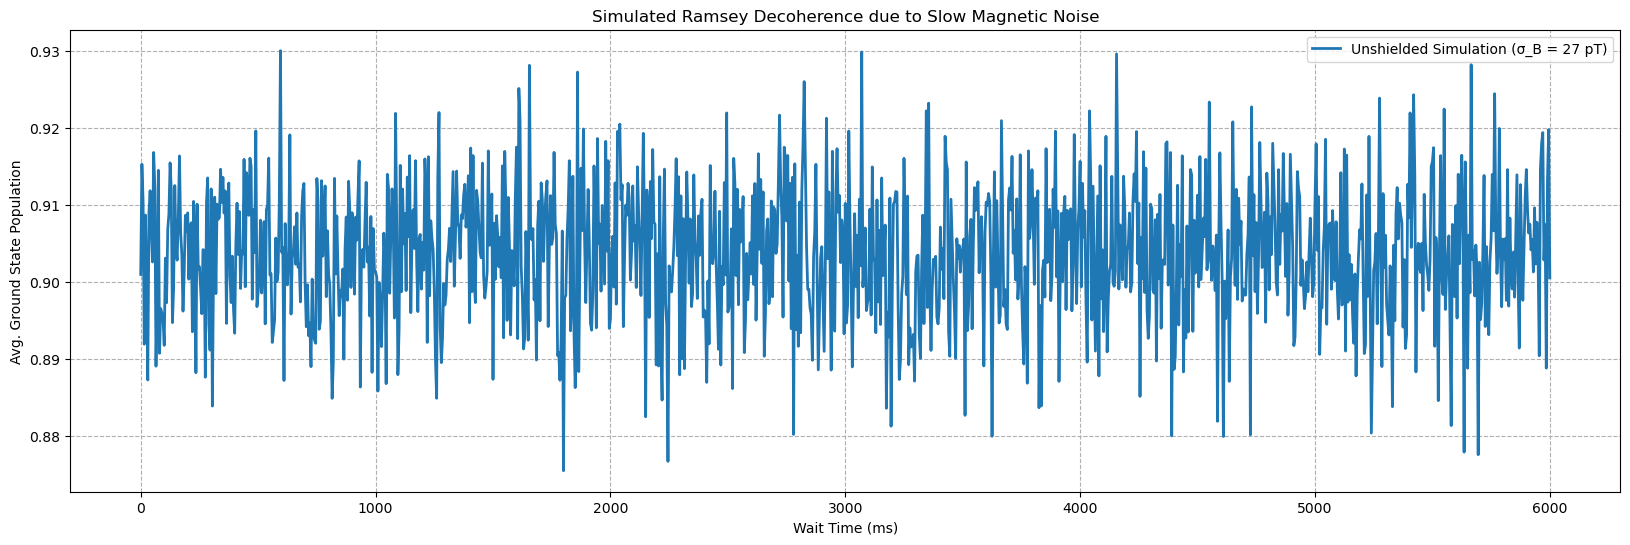

In [16]:
figure(figsize=(20, 6))
# plot(times * 1e3, pops, label="Shielded Simulation (σ_B = 2.7 pT)", linewidth=2)
plot(times_unshielded * 1e3, pops_unshielded, label="Unshielded Simulation (σ_B = 27 pT)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

Running simulation with SHIELDED noise (B_rms = 2.0e-6 T)


Simulating Ramsey Fringes... 100%|███████████████████████| Time: 0:19:33


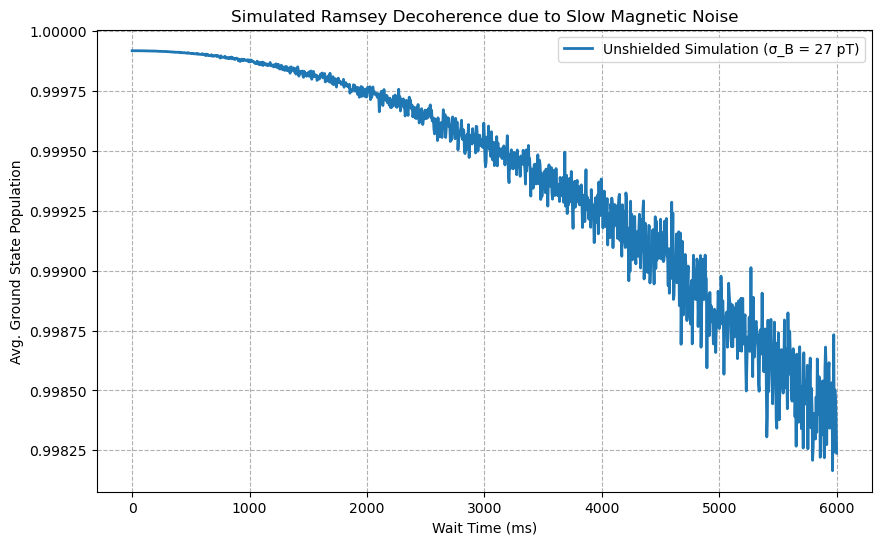

In [17]:
#  --- 1. System Setup (similar to your code) ---
# C = Ca40()
# chain = LinearChain(
#     ions=[C],
#     com_frequencies=(x=2e6, y=2e6, z=1e6),
#     vibrational_modes=(x=[1], y=[1], z=[1])
# )
# ψ₀ = product_state(C, "g")

# --- 2. Define Noise Parameters from the Paper ---
const N_shots = 200  # Number of experiments to average over. More is better.
const B_rms_shielded = 1e-6  # (T) The final shielded noise from the paper
const B_rms_unshielded = 2e-6 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution = Normal(0, B_rms_shielded)


# --- 3. Function to run ONE shot of a Ramsey experiment ---
# This function takes a specific, constant δB for a single shot
function run_ramsey_shot(t_wait, δB_shot)
    # The Chamber is now inside the function, as δB changes each time
    L = Laser()
    T = Chamber(
        iontrap=chain,
        B=0.37e-3,
        δB=δB_shot, # Use the random δB for this shot
        Bhat=ẑ,
        lasers=[L]
    )
    polarization!(L, (x̂ - ẑ)/√2)
    wavevector!(L, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L, C, ("g", "e"), T)

    # Ramsey sequence: π/2 pulse, wait, π/2 pulse
    h = pulse(T, tspan, 4e-6)
    tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)
    # Note: Rabi frequency and pulse times are illustrative
    # Ω = 2π * 50e3
    # τ_π_half = π / (2Ω)

    # # First π/2 pulse
    # _, sol_1 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ₀, h)
    # ψ_after_pulse1 = last(sol_1)

    # # Wait time (free evolution)
    # # During the wait, only the base Hamiltonian h affects the ion
    # _, sol_wait = timeevolution.schroedinger_dynamic(0:0.01e-6:t_wait, ψ_after_pulse1, h)
    # ψ_after_wait = last(sol_wait)

    # # Second π/2 pulse
    # _, sol_2 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ_after_wait, h)
    # ψ_final = last(sol_2)

    # Return the final probability of being in the 'g' state
    return expect(ionprojector(T, "g"), sol[end])
end


# --- 4. Main Simulation Loop (Ensemble Average) ---
function simulate_decoherence()
    wait_times = 0:5e-3:6 # Simulate for 300 ms, as in the paper's Ramsey fig
    avg_g_population = []

    @showprogress "Simulating Ramsey Fringes..." for t in wait_times
        final_pops_for_t = zeros(N_shots)
        for i in 1:N_shots
            # For each shot, draw a NEW random magnetic field offset
            noise_distribution = Normal(0, B_rms_shielded*t*2e-2)
            δB_shot = rand(noise_distribution)
            final_pops_for_t[i] = run_ramsey_shot(t, δB_shot)
        end
        # Average the results from all shots for this wait time
        push!(avg_g_population, real(sum(final_pops_for_t) / N_shots))
        # println("Wait time $(t*1e3) ms: Avg. g-pop = $(avg_g_population)")
    end
    return wait_times, avg_g_population
end

# --- 5. Run and Plot ---
println("Running simulation with SHIELDED noise (B_rms = $B_rms_unshielded T)")
#times, pops = simulate_decoherence()
# println(times)
# println(pops)

# You can re-run with the unshielded value to compare!
# noise_distribution = Normal(0, B_rms_unshielded)
# println("Running simulation with UNSHIELDED noise (B_rms = $B_rms_unshielded T)")
 times_unshielded, pops_unshielded = simulate_decoherence()

figure(figsize=(10, 6))
# plot(times * 1e3, pops, label="Shielded Simulation (σ_B = 2.7 pT)", linewidth=2)
plot(times_unshielded * 1e3, pops_unshielded, label="Unshielded Simulation (σ_B = 27 pT)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

Running simulation with SHIELDED noise (B_rms = 2.0e-6 T)


Simulating Ramsey Fringes... 100%|███████████████████████| Time: 0:18:06


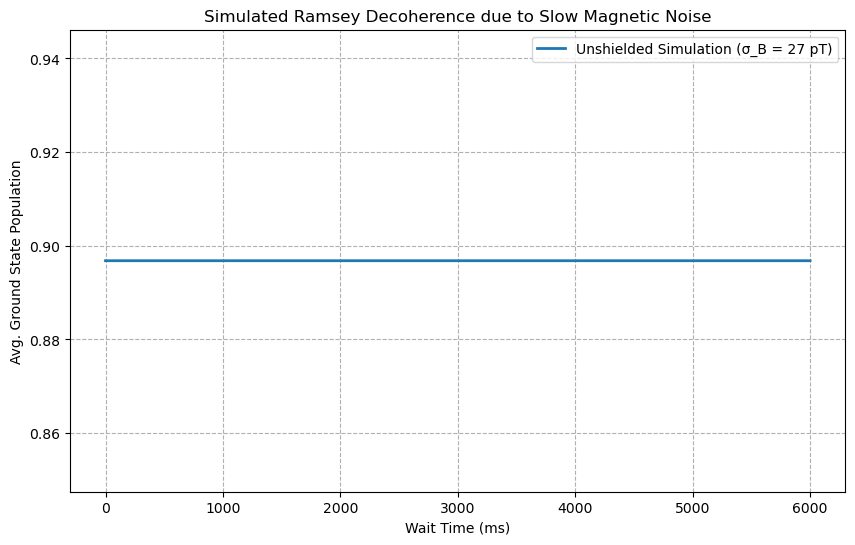

In [18]:
#  --- 1. System Setup (similar to your code) ---
# C = Ca40()
# chain = LinearChain(
#     ions=[C],
#     com_frequencies=(x=2e6, y=2e6, z=1e6),
#     vibrational_modes=(x=[1], y=[1], z=[1])
# )
# ψ₀ = product_state(C, "g")

# --- 2. Define Noise Parameters from the Paper ---
const N_shots = 200  # Number of experiments to average over. More is better.
const B_rms_shielded = 1e-6  # (T) The final shielded noise from the paper
const B_rms_unshielded = 2e-6 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution = Normal(0, B_rms_shielded)


# --- 3. Function to run ONE shot of a Ramsey experiment ---
# This function takes a specific, constant δB for a single shot
function run_ramsey_shot(t_wait, δB_shot)
    # The Chamber is now inside the function, as δB changes each time
    L = Laser()
    T = Chamber(
        iontrap=chain,
        B=0.37e-3,
        δB=δB_shot, # Use the random δB for this shot
        Bhat=ẑ,
        lasers=[L]
    )
    polarization!(L, (x̂ - ẑ)/√2)
    wavevector!(L, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L, C, ("g", "e"), T)

    # Ramsey sequence: π/2 pulse, wait, π/2 pulse
    h = pulse(T, tspan, 4e-6)
    tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)
    # Note: Rabi frequency and pulse times are illustrative
    # Ω = 2π * 50e3
    # τ_π_half = π / (2Ω)

    # # First π/2 pulse
    # _, sol_1 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ₀, h)
    # ψ_after_pulse1 = last(sol_1)

    # # Wait time (free evolution)
    # # During the wait, only the base Hamiltonian h affects the ion
    # _, sol_wait = timeevolution.schroedinger_dynamic(0:0.01e-6:t_wait, ψ_after_pulse1, h)
    # ψ_after_wait = last(sol_wait)

    # # Second π/2 pulse
    # _, sol_2 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ_after_wait, h)
    # ψ_final = last(sol_2)

    # Return the final probability of being in the 'g' state
    return expect(ionprojector(T, "g"), sol[end])
end


# --- 4. Main Simulation Loop (Ensemble Average) ---
function simulate_decoherence()
    wait_times = 0:5e-3:6 # Simulate for 300 ms, as in the paper's Ramsey fig
    avg_g_population = []

    @showprogress "Simulating Ramsey Fringes..." for t in wait_times
        final_pops_for_t = zeros(N_shots)
        for i in 1:N_shots
            # For each shot, draw a NEW random magnetic field offset
            δB_shot = 1e-6
            final_pops_for_t[i] = run_ramsey_shot(t, δB_shot)
        end
        # Average the results from all shots for this wait time
        push!(avg_g_population, real(sum(final_pops_for_t) / N_shots))
        # println("Wait time $(t*1e3) ms: Avg. g-pop = $(avg_g_population)")
    end
    return wait_times, avg_g_population
end

# --- 5. Run and Plot ---
println("Running simulation with SHIELDED noise (B_rms = $B_rms_unshielded T)")
#times, pops = simulate_decoherence()
# println(times)
# println(pops)

# You can re-run with the unshielded value to compare!
# noise_distribution = Normal(0, B_rms_unshielded)
# println("Running simulation with UNSHIELDED noise (B_rms = $B_rms_unshielded T)")
 times_unshielded, pops_unshielded = simulate_decoherence()

figure(figsize=(10, 6))
# plot(times * 1e3, pops, label="Shielded Simulation (σ_B = 2.7 pT)", linewidth=2)
plot(times_unshielded * 1e3, pops_unshielded, label="Unshielded Simulation (σ_B = 27 pT)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())

In [ ]:
#  --- 1. System Setup (similar to your code) ---
# C = Ca40()
# chain = LinearChain(
#     ions=[C],
#     com_frequencies=(x=2e6, y=2e6, z=1e6),
#     vibrational_modes=(x=[1], y=[1], z=[1])
# )
# ψ₀ = product_state(C, "g")

# --- 2. Define Noise Parameters from the Paper ---
const N_shots = 200  # Number of experiments to average over. More is better.
const B_rms_shielded = 1e-6  # (T) The final shielded noise from the paper
const B_rms_unshielded = 2e-6 # (T) Example for 20 dB worse noise

# Create the Gaussian distribution for the magnetic field noise
# This replaces your B_span!
noise_distribution = Normal(0, B_rms_shielded)


# --- 3. Function to run ONE shot of a Ramsey experiment ---
# This function takes a specific, constant δB for a single shot
function run_ramsey_shot(t_wait, δB_shot)
    # The Chamber is now inside the function, as δB changes each time
    L = Laser()
    T = Chamber(
        iontrap=chain,
        B=0.37e-3,
        δB=δB_shot, # Use the random δB for this shot
        Bhat=ẑ,
        lasers=[L]
    )
    polarization!(L, (x̂ - ẑ)/√2)
    wavevector!(L, (x̂ + ẑ)/√2);
    wavelength_from_transition!(L, C, ("g", "e"), T)

    # Ramsey sequence: π/2 pulse, wait, π/2 pulse
    tspan = 0:0.1:t_wait*1e6
    h = pulse(T, tspan, 4e-6)
    tout, sol = timeevolution.schroedinger_dynamic(tspan, ψ₀, h)
    # Note: Rabi frequency and pulse times are illustrative
    # Ω = 2π * 50e3
    # τ_π_half = π / (2Ω)

    # # First π/2 pulse
    # _, sol_1 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ₀, h)
    # ψ_after_pulse1 = last(sol_1)

    # # Wait time (free evolution)
    # # During the wait, only the base Hamiltonian h affects the ion
    # _, sol_wait = timeevolution.schroedinger_dynamic(0:0.01e-6:t_wait, ψ_after_pulse1, h)
    # ψ_after_wait = last(sol_wait)

    # # Second π/2 pulse
    # _, sol_2 = timeevolution.schroedinger_dynamic(0:0.01e-6:τ_π_half, ψ_after_wait, h)
    # ψ_final = last(sol_2)

    # Return the final probability of being in the 'g' state
    return expect(ionprojector(T, "g"), sol[end])
end


# --- 4. Main Simulation Loop (Ensemble Average) ---
function simulate_decoherence()
    wait_times = 5e-3:5e-3:3 # Simulate for 300 ms, as in the paper's Ramsey fig
    avg_g_population = []

    @showprogress "Simulating Ramsey Fringes..." for t in wait_times
        final_pops_for_t = zeros(N_shots)
        for i in 1:N_shots
            # For each shot, draw a NEW random magnetic field offset
            δB_shot = 1e-6
            final_pops_for_t[i] = run_ramsey_shot(t, δB_shot)
        end
        # Average the results from all shots for this wait time
        push!(avg_g_population, real(sum(final_pops_for_t) / N_shots))
        # println("Wait time $(t*1e3) ms: Avg. g-pop = $(avg_g_population)")
    end
    return wait_times, avg_g_population
end

# --- 5. Run and Plot ---
println("Running simulation with SHIELDED noise (B_rms = $B_rms_unshielded T)")
#times, pops = simulate_decoherence()
# println(times)
# println(pops)

# You can re-run with the unshielded value to compare!
# noise_distribution = Normal(0, B_rms_unshielded)
# println("Running simulation with UNSHIELDED noise (B_rms = $B_rms_unshielded T)")
 times_unshielded, pops_unshielded = simulate_decoherence()

figure(figsize=(20, 6))
# plot(times * 1e3, pops, label="Shielded Simulation (σ_B = 2.7 pT)", linewidth=2)
plot(times_unshielded * 1e3, pops_unshielded, label="Unshielded Simulation (σ_B = 27 pT)", linewidth=2)

xlabel("Wait Time (ms)")
ylabel("Avg. Ground State Population")
#ylim(0, 1e-11)
title("Simulated Ramsey Decoherence due to Slow Magnetic Noise")
grid(true, linestyle="--")
legend()
show()
display(gcf())